<a href="https://colab.research.google.com/github/dai02012000/basis_deep_learning/blob/main/exercise_c6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# đọc cvs 
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dlwpt-code/data/p1ch4/tabular-wine/winequality-white.csv', delimiter=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
# chuyển vể torch tensor
import torch

wine_tensor = torch.tensor(df.values, dtype=torch.float32)
wine_tensor


tensor([[ 7.0000,  0.2700,  0.3600,  ...,  0.4500,  8.8000,  6.0000],
        [ 6.3000,  0.3000,  0.3400,  ...,  0.4900,  9.5000,  6.0000],
        [ 8.1000,  0.2800,  0.4000,  ...,  0.4400, 10.1000,  6.0000],
        ...,
        [ 6.5000,  0.2400,  0.1900,  ...,  0.4600,  9.4000,  6.0000],
        [ 5.5000,  0.2900,  0.3000,  ...,  0.3800, 12.8000,  7.0000],
        [ 6.0000,  0.2100,  0.3800,  ...,  0.3200, 11.8000,  6.0000]])

In [4]:
# chia data, và target, target là điểm số đánh giá về rượu dựa trên thành phần của rượu
data = wine_tensor[:, :-1]
target = wine_tensor[:, -1]
data.shape, target.shape

(torch.Size([4898, 11]), torch.Size([4898]))

In [5]:
# thêm 1 chiều để đúng dim với data, phục vụ cho chia batch  
target = target.unsqueeze(1)
target.shape

torch.Size([4898, 1])

In [6]:
# random index để chia tập train, val
examples = data.shape[0]
p = torch.randperm(examples)
ind_val = int(0.2 * examples)

ind_train = p[:-ind_val]
ind_val = p[-ind_val:]

ind_val.shape, ind_train.shape

(torch.Size([979]), torch.Size([3919]))

In [7]:

# chia tập train, val
train_data = data[ind_train]
val_data = data[ind_val]

train_target = target[ind_train]
val_target = target[ind_val]

train_data.shape, val_data.shape, train_target.shape, val_target.shape

(torch.Size([3919, 11]),
 torch.Size([979, 11]),
 torch.Size([3919, 1]),
 torch.Size([979, 1]))

In [8]:
# chia
batch_size = 16

train_data_loader = []
val_data_loader = []
train_target_loader = []
val_target_loader = []

iter_train = int(train_data.shape[0]/batch_size)
for i in range(1, iter_train+2):
  train_data_batch = train_data[(i-1)*batch_size : i*batch_size]
  train_target_batch = train_target[(i-1)*batch_size : i*batch_size]

  train_data_loader.append(train_data_batch)
  train_target_loader.append(train_target_batch)
  
iter_val = int(val_data.shape[0]/batch_size)
for i in range(1, iter_val+2):
  val_data_batch = val_data[(i-1)*batch_size : i*batch_size]
  val_target_batch = val_target[(i-1)*batch_size : i*batch_size]

  val_data_loader.append(val_data_batch)
  val_target_loader.append(val_target_batch)


len(train_data_loader), len(val_data_loader), len(train_target_loader), len(val_target_loader),train_data_loader[0]

(245,
 62,
 245,
 62,
 tensor([[7.7000e+00, 3.9000e-01, 4.9000e-01, 7.7000e+00, 3.6000e-02, 1.1000e+01,
          1.1000e+02, 9.9660e-01, 3.3300e+00, 7.6000e-01, 1.0000e+01],
         [5.6000e+00, 3.4000e-01, 1.0000e-01, 1.3000e+00, 3.1000e-02, 2.0000e+01,
          6.8000e+01, 9.9060e-01, 3.3600e+00, 5.1000e-01, 1.1200e+01],
         [7.6000e+00, 4.7000e-01, 4.9000e-01, 1.3000e+01, 2.3900e-01, 4.2000e+01,
          2.2000e+02, 9.9880e-01, 2.9600e+00, 5.1000e-01, 9.2000e+00],
         [6.3000e+00, 3.5000e-01, 3.0000e-01, 5.7000e+00, 3.5000e-02, 8.0000e+00,
          9.7000e+01, 9.9270e-01, 3.2700e+00, 4.1000e-01, 1.1000e+01],
         [7.6000e+00, 1.9000e-01, 4.1000e-01, 1.1000e+00, 4.0000e-02, 3.8000e+01,
          1.4300e+02, 9.9070e-01, 2.9200e+00, 4.2000e-01, 1.1400e+01],
         [5.8000e+00, 2.8000e-01, 3.0000e-01, 3.9000e+00, 2.6000e-02, 3.6000e+01,
          1.0500e+02, 9.8963e-01, 3.2600e+00, 5.8000e-01, 1.2750e+01],
         [7.3000e+00, 2.0000e-01, 3.7000e-01, 1.2000e+00, 3.

In [48]:
# model 
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn


class SubClassFunctionalModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.hidden_linear1 = nn.Linear(11, 1)
    # self.hidden_linear2 = nn.Linear(100, 100)
    # self.output_linear = nn.Linear(50, 1)

  def forward(self, input):
    # hidden_t = self.hidden_linear1(input)
    # activated_t = torch.tanh(hidden_t)
    # output_t = self.hidden_linear2(activated_t)
    # output_t = torch.tanh(output_t)
    output_t = self.hidden_linear1(input)

    return output_t

func_model = SubClassFunctionalModel()
func_model.parameters

<bound method Module.parameters of SubClassFunctionalModel(
  (hidden_linear1): Linear(in_features=11, out_features=1, bias=True)
)>

In [49]:
list_loss_train = []
list_loss_test = []

In [50]:
def train(optimizer, model, loss_fn, train_data_loader, train_target_loader, epoch):
  for iter, (data, target) in enumerate(zip(train_data_loader, train_target_loader)):
    train_target_p = model(data)
    loss_train = loss_fn(train_target_p, target)
    list_loss_train.append(loss_train)

    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    if iter % 20 == 0:
      print("Train Epoch: {} [{}/{}] \tLoss: {:.6f} ".format(
          epoch, iter , len(train_data_loader), loss_train.item()
      ))

In [51]:
def test(model, loss_fn, val_data_loader, val_target_loader):
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for ind, (data, target) in enumerate(zip(val_data_loader, val_target_loader)):
      # print(ind)
      # print(data.shape, target.shape)
      output = model(data)
      test_loss += loss_fn(output, target)
      # print(loss_fn(output, target))
      # if torch.isnan(loss_fn(output, target)):
      #   print(data)
      #   print(output)
      #   print(target)
        


      # print(loss_fn(output, target))
      # print(test_loss)
      
      output = output.to(torch.int32)
      correct += output.eq(target.view_as(output)).sum().item()
      
  test_loss /= len(val_data_loader) 
  list_loss_test.append(test_loss)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(val_data_loader)*batch_size,
        100. * correct / (len(val_data_loader)*batch_size)))

In [52]:

optimizer = optim.Adam(func_model.parameters(), lr=0.005)

for epoch in range(1, 100):
  train(optimizer,func_model, nn.MSELoss(), train_data_loader, train_target_loader, epoch)
  test(func_model, nn.MSELoss(), val_data_loader, val_target_loader)


Train Epoch: 1 [0/245] 	Loss: 42.227596 
Train Epoch: 1 [20/245] 	Loss: 4.399013 
Train Epoch: 1 [40/245] 	Loss: 4.179076 
Train Epoch: 1 [60/245] 	Loss: 9.293327 
Train Epoch: 1 [80/245] 	Loss: 3.299748 
Train Epoch: 1 [100/245] 	Loss: 1.808498 
Train Epoch: 1 [120/245] 	Loss: 0.927483 
Train Epoch: 1 [140/245] 	Loss: 2.501730 
Train Epoch: 1 [160/245] 	Loss: 1.261050 
Train Epoch: 1 [180/245] 	Loss: 0.493297 
Train Epoch: 1 [200/245] 	Loss: 1.038398 
Train Epoch: 1 [220/245] 	Loss: 0.601000 
Train Epoch: 1 [240/245] 	Loss: 1.449217 

Test set: Average loss: 0.7938, Accuracy: 295/992 (30%)

Train Epoch: 2 [0/245] 	Loss: 0.866032 
Train Epoch: 2 [20/245] 	Loss: 1.269039 
Train Epoch: 2 [40/245] 	Loss: 0.546934 
Train Epoch: 2 [60/245] 	Loss: 0.954867 
Train Epoch: 2 [80/245] 	Loss: 0.523205 
Train Epoch: 2 [100/245] 	Loss: 0.632415 
Train Epoch: 2 [120/245] 	Loss: 0.668409 
Train Epoch: 2 [140/245] 	Loss: 0.874781 
Train Epoch: 2 [160/245] 	Loss: 0.449924 
Train Epoch: 2 [180/245] 	Los

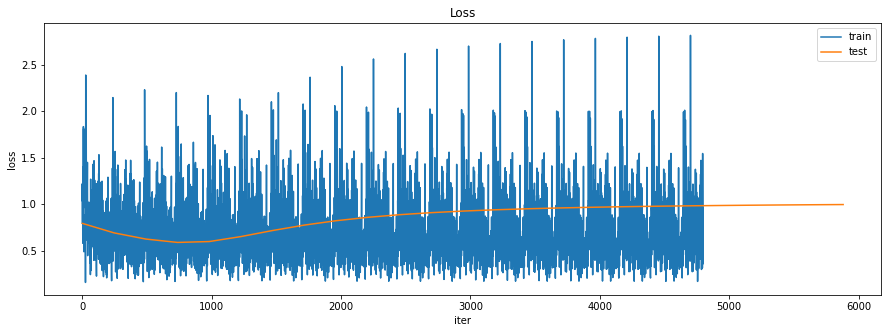

In [53]:
import numpy as np
import matplotlib.pyplot as plt

x = range(1, 24250, 245)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(list_loss_train[200:5000], label='train')
ax.plot(x[:25], list_loss_test[:25], label='test')

ax.set_xlabel('iter')
ax.set_ylabel('loss')

plt.title('Loss')
plt.legend();

In [ ]:
fn = nn.MSELoss()
loss = fn(torch.tensor([1., 2., 3.]), torch.tensor([4., 5., 6.]))
loss

tensor(9.)